## Retail Strategy and Analytics

### Description
The projects uses Python to analyse the current purchasing trends and behaviours for a report that will help the company to understand the customer's purchasing behaviours and to develop a strategy to increase the customer's purchase. We will to derive features such as product, period, pack size and brand name from the data and define metrics of interest to draw insights on who spends on chips and what drives spends for each customer segment.

### Load required libraries and datasets

In [125]:
import time, os, string, json
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import datetime
import matplotlib.pyplot as plt

In [126]:
df_customers = pd.read_csv('QVI_purchase_behaviour.csv')
df_customers


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [127]:
df_transactions = pd.read_excel('QVI_transaction_data.xlsx')
df_transactions


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


### Exploratory data analysis
The first step in any analysis is to first understand the data. Let’s take a look at each of the datasets provided.

**Examining transaction data**
- Let’s check if columns we would expect to be numeric are in numeric form and date columns are in dateformat.

In [128]:
# check types of columns in df_transactions
df_transactions.dtypes


DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

We can see that the date column is in an integer format. Let’s change this to a date format.

In [129]:
# change the type of `DATE` column to datetime by adding it as the number of days since 1899-12-30
df_transactions['DATE'] = pd.to_datetime(df_transactions['DATE'], unit='D', origin='1899-12-30')
df_transactions.dtypes
df_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Let's clean the null values in the dataset.

In [130]:
# check for NaN values in the df_transactions and delete the rows with NaN values
df_transactions.dropna(inplace=True)
df_transactions.isnull().sum()
df_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Next, we should check that we are looking at the right products by examining PROD_NAME. Let’s remove all words with digits and special characters from our set of products

In [131]:
# examine the words in PROD_NAME to see if there are any incorrect entries amd remove the special characters and blank space from PROD_NAME
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str.replace(r'[^\w\s]', '')
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str.strip().copy()
df_transactions['PROD_NAME'].unique()
df_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


There are salsa products in the dataset but we are only interested in the chips category, so let’s remove

In [132]:
# Remove salsa products from PROD_NAME
df_transactions = df_transactions[~df_transactions['PROD_NAME'].str.contains('Salsa')]
df_transactions['PROD_NAME'].unique().copy()
df_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Next, we check summary statistics such as mean, min and max values for each feature to see if there are any obvious outliers in the data 

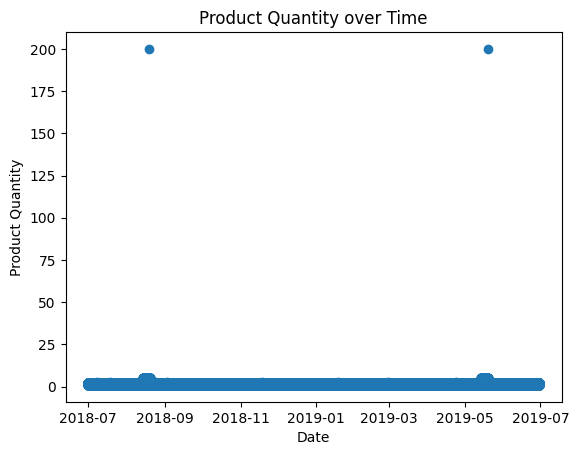

In [133]:
# plot the PROD_QTY column as a scatter plot with matplotlib
plt.scatter(df_transactions['DATE'], df_transactions['PROD_QTY'])
plt.xlabel('Date')
plt.ylabel('Product Quantity')
plt.title('Product Quantity over Time')
plt.show()


There appears to have an outlier which we should investigate further. Let’s investigate further the case where 200 packets of chips are bought in one transaction.


In [134]:
# show rows with PROD_QTY = 200
df_transactions[df_transactions['PROD_QTY'] == 200]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions where by the same customer.

In [135]:

# show all rows with LYLTY_CARD_NBR = 226000
df_transactions[df_transactions['LYLTY_CARD_NBR'] == 226000]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We’ll remove this loyalty card number from further analysis

In [136]:

# delete the rows with PROD_QTY = 200 from the df_transactions dataframe
df_transactions = df_transactions[df_transactions['PROD_QTY'] != 200].copy()
df_transactions


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Now, let’s look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

In [137]:
# check for the number of transactions per date, and sort from earliest date to latest date
df_date_transactions = df_transactions.groupby('DATE').agg(
    count=('TXN_ID', 'count')
).sort_values('DATE').reset_index()
df_date_transactions

,DATE,count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


There’s only 364 rows, meaning only 364 dates which indicates a missing date. Let’s create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

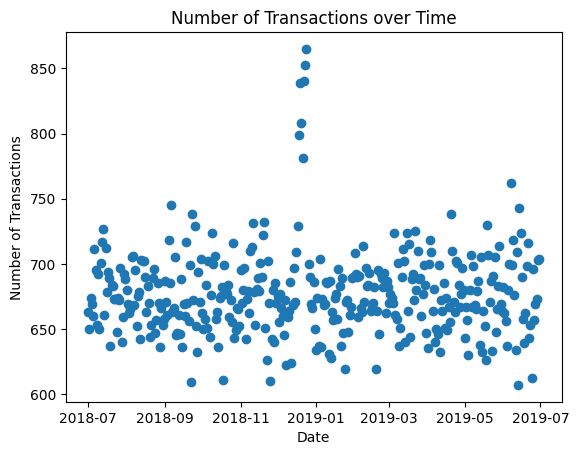

In [138]:
# plot the number of transactions per date as a scatter chart with matplotlib
plt.scatter(df_date_transactions['DATE'], df_date_transactions['count'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions over Time')
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

Now that we move on to creating other features as pack size from PROD_NAME. We will start with pack size.

In [139]:
# take the digits that are in PROD_NAME and convert them to intergers
df_pack_size = df_transactions['PROD_NAME'].str.extract(r'(\d+)').astype(int)
df_pack_size

,0
0,175
1,175
2,170
3,175
4,150
...,...
264831,175
264832,175
264833,170
264834,150


In [140]:
# add the pack size column to the df_transactions dataframe
df_transactions['PACK_SIZE'] = df_pack_size
df_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150


In [141]:
# sort the pack size dataframe in descending order
df_pack_size = df_pack_size.sort_values(0, ascending=False).reset_index(drop=True)
df_pack_size

,0
0,380
1,380
2,380
3,380
4,380
...,...
246735,70
246736,70
246737,70
246738,70


The largest size is 380g and the smallest size is 70g - seems sensible!

Let's plot a histogram of PACK_SIZE to see if any outliers

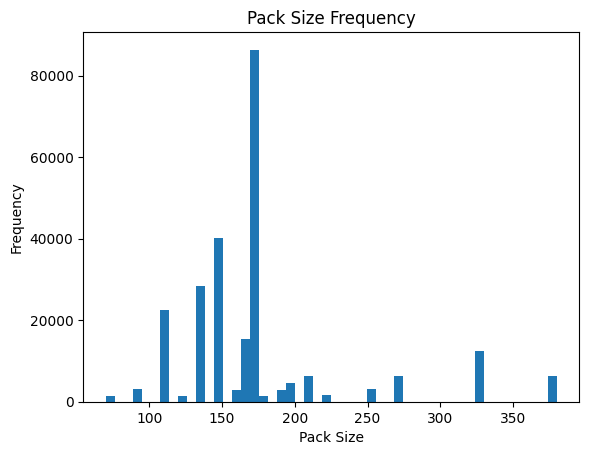

In [142]:
# plot the pack size as a histogram with matplotlib
plt.hist(df_pack_size[0], bins=50)
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Pack Size Frequency')
plt.show()

Pack sizes created look reasonable and now to create brands, we can use the first word in PROD_NAME to work out the brand name


In [143]:
# create a new dataframe which contains the first word of `PROD_NAME`
df_brand = df_transactions['PROD_NAME'].str.split().str[0]
df_brand

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: PROD_NAME, Length: 246740, dtype: object

In [144]:
# count the number of unique values in df_brand
df_brand.value_counts()


PROD_NAME
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips. Let’s combine these together

In [145]:
# Clean brand names
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str.replace('Red', 'RRD')
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str.replace('Doritos', 'Dorito')
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str.replace('Infzns', 'Infuzions')
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str.replace('WW', 'Woolworths')
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str.replace('Smiths', 'Smiths')
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str.replace('Grain', 'GrnWves')
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str.replace('Snbts', 'Sunbites')
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str.replace('NCC', 'Natural')
df_transactions['PROD_NAME'] = df_transactions['PROD_NAME'].str.replace('Dorito', 'Doritos')
df_transactions 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150


Let's check the dataset again

In [146]:
# check the uniques values in df_brand
df_brand = df_transactions['PROD_NAME'].str.split().str[0]
df_brand.value_counts()

PROD_NAME
Kettle        41288
Smiths        27390
Doritos       25224
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
GrnWves        7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Smith          2963
Cheetos        2927
Burger         1564
French         1418
Name: count, dtype: int64

Now that we are happy with the transaction dataset, let’s have a look at the customer dataset.

**Examining customer data**



In [147]:
# check the Nan values in the df_customers dataframe and delete the rows with Nan values
df_customers.dropna(inplace=True)
df_customers.isnull().sum()
df_customers


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [148]:
# check the duplicates in the df_customers dataframe and delete the duplicates
df_customers.duplicated().sum()
df_customers.drop_duplicates(inplace=True)
df_customers.duplicated().sum()
df_customers


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


Great, there are no nulls and duplcate values! So all our customers in the transaction data has been accounted for in the customer dataset.
Data exploration is now complete!


### Data analysis on customer segments
Now that the data is ready for analysis, we can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What’s the average chip price by customer segment
Let’s start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER


In [149]:
# merge the df_transactions and df_customers dataframes on the `LYLTY_CARD_NBR` column
df_merged = df_transactions.merge(df_customers, on='LYLTY_CARD_NBR').copy()
df_merged


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,YOUNG SINGLES/COUPLES,Premium


Now we plot the split by these segments to describe which customer segment contribute most to chip sales

In [150]:
# count percentage 'TOT_SALES' group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER'
df_sales = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_sales=('TOT_SALES', 'sum')
).sort_values('total_sales', ascending=False).reset_index()
df_sales['total_sales_percentage'] = df_sales.groupby('LIFESTAGE')['total_sales'].transform(lambda x: x / x.sum() * 100)
df_sales


,LIFESTAGE,PREMIUM_CUSTOMER,total_sales,total_sales_percentage
0,OLDER FAMILIES,Budget,156863.75,47.748630
1,YOUNG SINGLES/COUPLES,Mainstream,147582.20,60.544904
2,RETIREES,Mainstream,145168.95,42.399715
3,YOUNG FAMILIES,Budget,129717.95,44.027721
4,OLDER SINGLES/COUPLES,Budget,127833.60,33.996521
5,OLDER SINGLES/COUPLES,Mainstream,124648.50,33.149464
6,OLDER SINGLES/COUPLES,Premium,123537.55,32.854014
7,RETIREES,Budget,105916.30,30.935134
8,OLDER FAMILIES,Mainstream,96413.55,29.347857
9,RETIREES,Premium,91296.65,26.665151


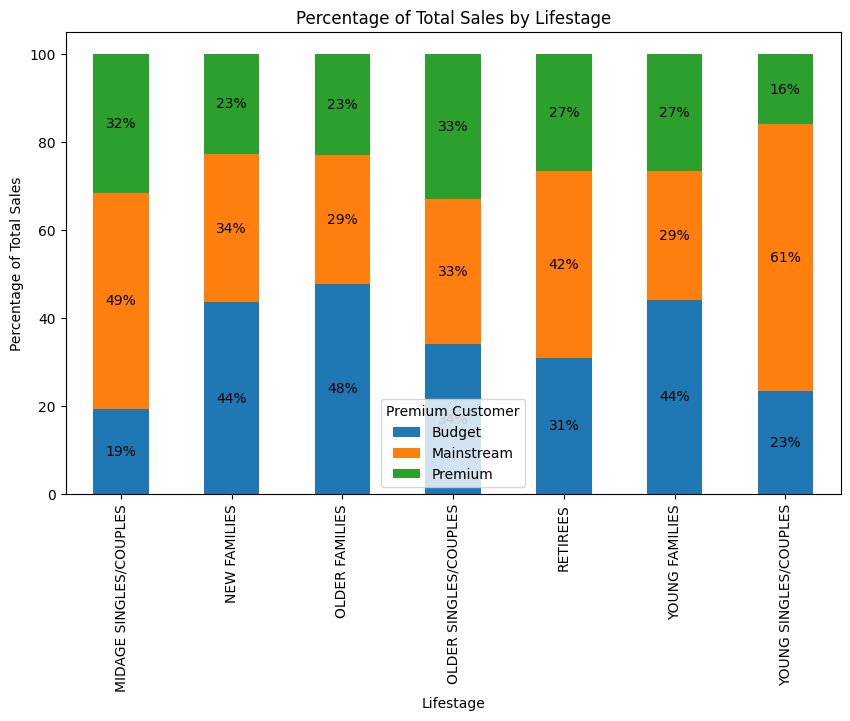

In [151]:
# plot the chart in stacked bar with percenrage of total sales with matplotlib
pivot_table = df_sales.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='total_sales_percentage')
pivot_table.plot(kind='bar', stacked=True, ax=plt.gca(), figsize=(10, 6))
plt.xlabel('Lifestage')
plt.ylabel('Percentage of Total Sales')
plt.title('Percentage of Total Sales by Lifestage')
plt.legend(title='Premium Customer')
for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.gca().annotate(f'{height:.0f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.show()


From total sales, we can see that sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - Retirees. And from the chart, we can define most loyal customer segments by lifestage are Mainsream young singles/couples, Mainstream Midage singles/couples, and Budget older families.

Let’s see if the higher sales are due to there being more customers who buy chips

In [152]:
# count the number of customers group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER'
df_cus_count = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    count=('LYLTY_CARD_NBR', 'count')
).sort_values('count', ascending=False).reset_index()
df_cus_count 


,LIFESTAGE,PREMIUM_CUSTOMER,count
0,OLDER FAMILIES,Budget,21514
1,RETIREES,Mainstream,19970
2,YOUNG SINGLES/COUPLES,Mainstream,19544
3,YOUNG FAMILIES,Budget,17763
4,OLDER SINGLES/COUPLES,Budget,17172
5,OLDER SINGLES/COUPLES,Mainstream,17061
6,OLDER SINGLES/COUPLES,Premium,16560
7,RETIREES,Budget,14225
8,OLDER FAMILIES,Mainstream,13241
9,RETIREES,Premium,12236


In [153]:
#count the proportion of customers group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER'
df_cus_count['count_percentage'] = df_cus_count.groupby('LIFESTAGE')['count'].transform(lambda x: x / x.sum() * 100)
df_cus_count

,LIFESTAGE,PREMIUM_CUSTOMER,count,count_percentage
0,OLDER FAMILIES,Budget,21514,47.641614
1,RETIREES,Mainstream,19970,43.010058
2,YOUNG SINGLES/COUPLES,Mainstream,19544,57.534811
3,YOUNG FAMILIES,Budget,17763,43.865758
4,OLDER SINGLES/COUPLES,Budget,17172,33.807808
5,OLDER SINGLES/COUPLES,Mainstream,17061,33.589274
6,OLDER SINGLES/COUPLES,Premium,16560,32.602918
7,RETIREES,Budget,14225,30.636859
8,OLDER FAMILIES,Mainstream,13241,29.321493
9,RETIREES,Premium,12236,26.353083


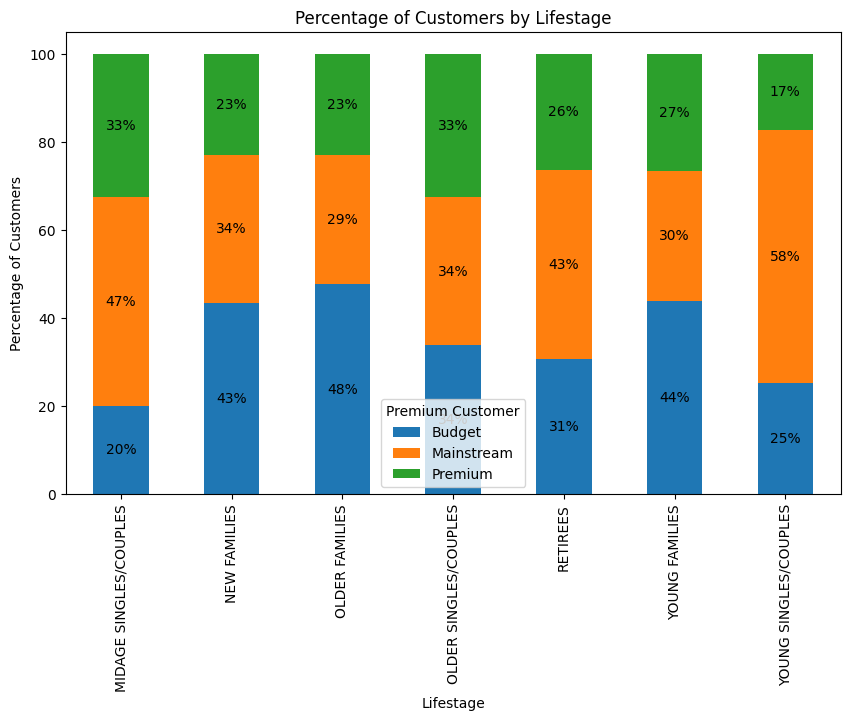

In [154]:
# plot the chart in stacked bar with percenrage of total customers with matplotlib
pivot_table = df_cus_count.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='count_percentage')
pivot_table.plot(kind='bar', stacked=True, ax=plt.gca(), figsize=(10, 6))
plt.xlabel('Lifestage')
plt.ylabel('Percentage of Customers')
plt.title('Percentage of Customers by Lifestage')
plt.legend(title='Premium Customer')
for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.gca().annotate(f'{height:.0f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.show()

The mains cutomer segments generated for sales are Mainstream young singles/couples, Mainstream Retirees, and Budget older families. And most loyal customer segments by lifestage are Mainstream young singles/couples, Mainstream midage singles/couples, and Budget older families.

Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this next.

In [155]:
# count the number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER by dividing the total quantity of products purchased by the number of customers
df_units_per_cus = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_units=('PROD_QTY', 'sum'),
    total_cus=('LYLTY_CARD_NBR', 'nunique')
).reset_index()
df_units_per_cus['units_per_cus'] = df_units_per_cus['total_units'] / df_units_per_cus['total_cus']
df_units_per_cus


,LIFESTAGE,PREMIUM_CUSTOMER,total_units,total_cus,units_per_cus
0,MIDAGE SINGLES/COUPLES,Budget,8883,1474,6.026459
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,3298,6.432080
2,MIDAGE SINGLES/COUPLES,Premium,14400,2369,6.078514
3,NEW FAMILIES,Budget,5241,1087,4.821527
4,NEW FAMILIES,Mainstream,4060,830,4.891566
5,NEW FAMILIES,Premium,2769,575,4.815652
6,OLDER FAMILIES,Budget,41853,4611,9.076773
7,OLDER FAMILIES,Mainstream,25804,2788,9.255380
8,OLDER FAMILIES,Premium,20239,2231,9.071717
9,OLDER SINGLES/COUPLES,Budget,32883,4849,6.781398


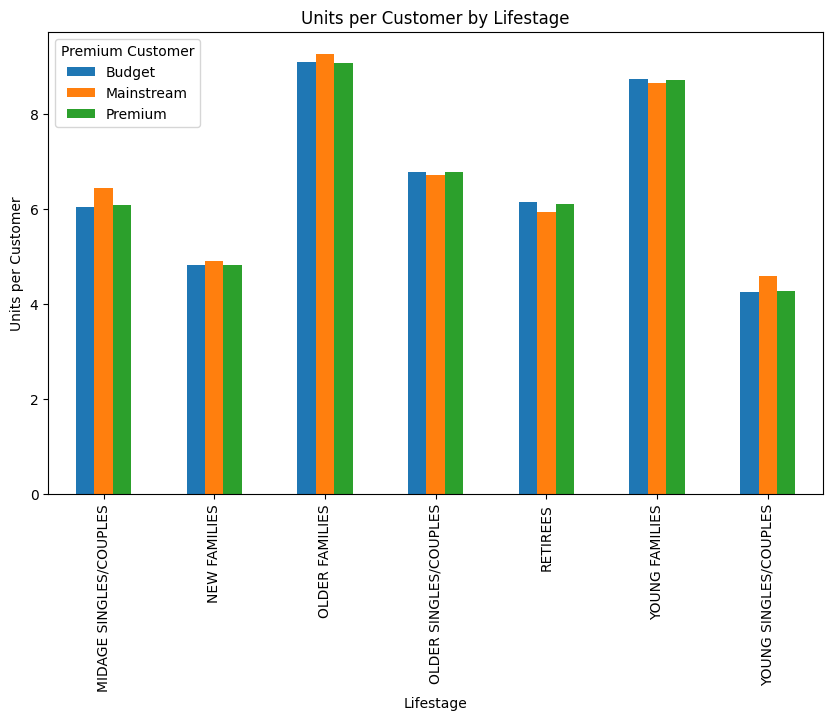

In [156]:

# plot df_units_per_cus as a group bar chart with matplotlib
pivot_table = df_units_per_cus.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='units_per_cus')
pivot_table.plot(kind='bar', ax=plt.gca(), figsize=(10, 6))
plt.xlabel('Lifestage')
plt.ylabel('Units per Customer')
plt.title('Units per Customer by Lifestage')
plt.legend(title='Premium Customer')
plt.show()


Older families and young families in general buy more chips per customer. 

 Let’s also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.


In [157]:
# count the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER by dividing the total sales by the total quantity of products purchased by each group
df_avg_price_per_unit = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_sales=('TOT_SALES', 'sum'),
    total_units=('PROD_QTY', 'sum')
).reset_index()
df_avg_price_per_unit['avg_price_per_unit'] = df_avg_price_per_unit['total_sales'] / df_avg_price_per_unit['total_units']
df_avg_price_per_unit


,LIFESTAGE,PREMIUM_CUSTOMER,total_sales,total_units,avg_price_per_unit
0,MIDAGE SINGLES/COUPLES,Budget,33345.70,8883,3.753878
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,21213,3.994449
2,MIDAGE SINGLES/COUPLES,Premium,54443.85,14400,3.780823
3,NEW FAMILIES,Budget,20607.45,5241,3.931969
4,NEW FAMILIES,Mainstream,15979.70,4060,3.935887
5,NEW FAMILIES,Premium,10760.80,2769,3.886168
6,OLDER FAMILIES,Budget,156863.75,41853,3.747969
7,OLDER FAMILIES,Mainstream,96413.55,25804,3.736380
8,OLDER FAMILIES,Premium,75242.60,20239,3.717703
9,OLDER SINGLES/COUPLES,Budget,127833.60,32883,3.887529


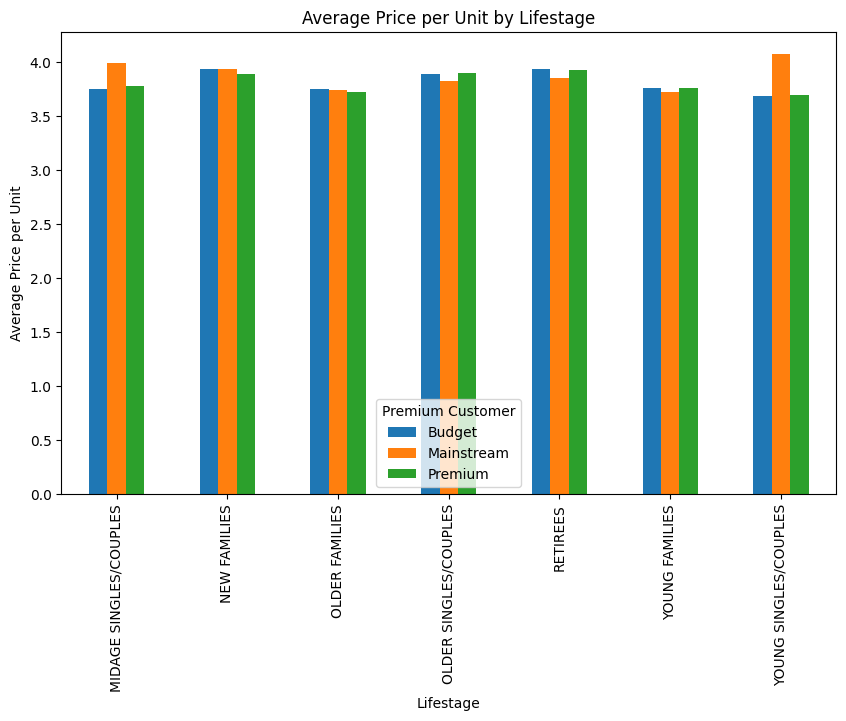

In [158]:
# plot df_avg_price_per_unit as a group bar chart with matplotlib
pivot_table = df_avg_price_per_unit.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='avg_price_per_unit')
pivot_table.plot(kind='bar', ax=plt.gca(), figsize=(10, 6))
plt.xlabel('Lifestage')
plt.ylabel('Average Price per Unit')
plt.title('Average Price per Unit by Lifestage')
plt.legend(title='Premium Customer')
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

**Deep dive into specific customer segments for insights**
- We will target customer segments that contribute the most to sales to retain them or further increase sales. Let’s look at Mainstream - young singles/couples

In [159]:
# create a new dataframe with columns of "Young Singles/Couples" and "Mainstream" from the df_merged dataframe
df_segment = df_merged[(df_merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df_merged['PREMIUM_CUSTOMER'] == 'Mainstream')].copy()
df_segment


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150,YOUNG SINGLES/COUPLES,Mainstream
221346,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175,YOUNG SINGLES/COUPLES,Mainstream
221347,2018-08-14,1,1291,333,27,Woolworths Supreme Cheese Corn Chips 200g,1,1.9,200,YOUNG SINGLES/COUPLES,Mainstream
221348,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380,YOUNG SINGLES/COUPLES,Mainstream
221349,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,134,YOUNG SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...
240884,2018-12-01,272,272377,270186,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,YOUNG SINGLES/COUPLES,Mainstream
240885,2018-07-27,272,272389,270200,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,YOUNG SINGLES/COUPLES,Mainstream
240886,2018-11-10,272,272389,270201,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,134,YOUNG SINGLES/COUPLES,Mainstream
240887,2019-04-01,272,272389,270202,62,Pringles Mystery Flavour 134g,2,7.4,134,YOUNG SINGLES/COUPLES,Mainstream


In [160]:
# add a new column `BRAND` to the df_segment dataframe which contains the first word of `PROD_NAME`
df_segment['BRAND'] = df_segment['PROD_NAME'].str.split().str[0]
df_segment

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150,YOUNG SINGLES/COUPLES,Mainstream,Smiths
221346,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175,YOUNG SINGLES/COUPLES,Mainstream,Kettle
221347,2018-08-14,1,1291,333,27,Woolworths Supreme Cheese Corn Chips 200g,1,1.9,200,YOUNG SINGLES/COUPLES,Mainstream,Woolworths
221348,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380,YOUNG SINGLES/COUPLES,Mainstream,Smiths
221349,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,134,YOUNG SINGLES/COUPLES,Mainstream,Pringles
...,...,...,...,...,...,...,...,...,...,...,...,...
240884,2018-12-01,272,272377,270186,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,YOUNG SINGLES/COUPLES,Mainstream,Cobs
240885,2018-07-27,272,272389,270200,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,YOUNG SINGLES/COUPLES,Mainstream,Kettle
240886,2018-11-10,272,272389,270201,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,134,YOUNG SINGLES/COUPLES,Mainstream,Pringles
240887,2019-04-01,272,272389,270202,62,Pringles Mystery Flavour 134g,2,7.4,134,YOUNG SINGLES/COUPLES,Mainstream,Pringles


In [161]:
# count the total sales group by 'BRAND' in the df_segment dataframe in descending order
df_brand_sales = df_segment.groupby('BRAND').agg(
    total_sales=('TOT_SALES', 'sum')
).sort_values('total_sales', ascending=False).reset_index()
df_brand_sales

,BRAND,total_sales
0,Kettle,35423.6
1,Doritos,20925.9
2,Pringles,16006.2
3,Smiths,14337.5
4,Infuzions,8749.4
5,Twisties,7539.8
6,Tostitos,7238.0
7,Thins,7217.1
8,Cobs,6144.6
9,Tyrrells,4800.6


In [162]:
# add the 'sale proportion' column to the df_brand_sales dataframe which contains the percentage of total sales of each brand
df_brand_sales['sale_proportion'] = df_brand_sales['total_sales'] / df_brand_sales['total_sales'].sum() * 100
df_brand_sales

,BRAND,total_sales,sale_proportion
0,Kettle,35423.6,24.002624
1,Doritos,20925.9,14.179149
2,Pringles,16006.2,10.845617
3,Smiths,14337.5,9.714925
4,Infuzions,8749.4,5.928493
5,Twisties,7539.8,5.108882
6,Tostitos,7238.0,4.904385
7,Thins,7217.1,4.890224
8,Cobs,6144.6,4.163510
9,Tyrrells,4800.6,3.252831


We can see that the most favourite brands of Mainstream young singles/couples sre Kettel's, Doritos' and Pringles' while the least favourite are French's, Sunbites' and Burges's.

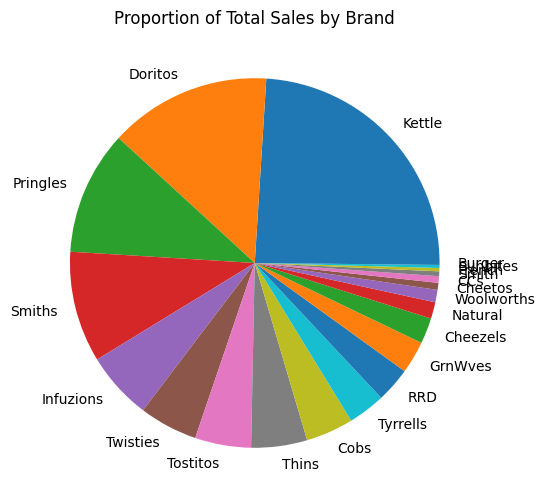

In [163]:
# plot the df_brand_sales as a pie chart with matplotlib
plt.figure(figsize=(10, 6))
plt.pie(df_brand_sales['sale_proportion'], labels=df_brand_sales['BRAND'])
plt.title('Proportion of Total Sales by Brand')
plt.show()

Next, we will look at the pack size preferences of Mainstream young singles/couples.

In [164]:
# count the total sales group by 'PACK_SIZE' in the df_segment dataframe in descending order
df_pack_sales = df_segment.groupby('PACK_SIZE').agg(
    total_sales=('TOT_SALES', 'sum')
).sort_values('total_sales', ascending=False).reset_index()
df_pack_sales

,PACK_SIZE,total_sales
0,175,37967.9
1,150,22946.2
2,134,16006.2
3,110,14630.0
4,330,12654.0
5,170,11893.4
6,165,7395.0
7,380,7175.9
8,270,5303.8
9,210,3798.0


In [165]:
# add the 'sale proportion' column to the df_pack_sales dataframe which contains the percentage of total sales of each pack size
df_pack_sales['sale_proportion'] = df_pack_sales['total_sales'] / df_pack_sales['total_sales'].sum() * 100
df_pack_sales


,PACK_SIZE,total_sales,sale_proportion
0,175,37967.9,25.726612
1,150,22946.2,15.548081
2,134,16006.2,10.845617
3,110,14630.0,9.913120
4,330,12654.0,8.574205
5,170,11893.4,8.058831
6,165,7395.0,5.010767
7,380,7175.9,4.862307
8,270,5303.8,3.593794
9,210,3798.0,2.573481


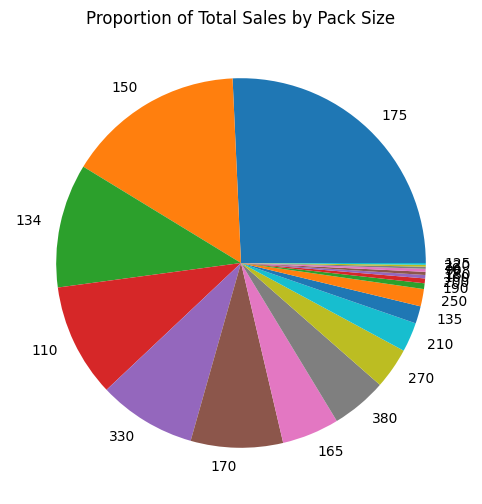

In [166]:

# plot the df_pack_sales as a pie chart with matplotlib
plt.figure(figsize=(10, 6))
plt.pie(df_pack_sales['sale_proportion'], labels=df_pack_sales['PACK_SIZE'])
plt.title('Proportion of Total Sales by Pack Size')
plt.show()



We can see that the most favourite pack sizes of Mainstream young singles/couples are 175g and 150g while the least favourite are 125g and 220g.

### Conclusion
- Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
- We’ve also found that Mainstream young singles and couples are more likely to purchase Kettel's and Doritos' and Pringles' chips compared to the rest of the brands. The recommendations are to increase the category’s performance by off-locating some Kettel's and Doritos' and Pringles' and in 150g/175g packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.